In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2D,MaxPooling2D,Flatten

from sklearn.metrics import confusion_matrix
import seaborn as sns

## Load the dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [3]:
x_train.shape

(60000, 28, 28)

##Visualizing the data

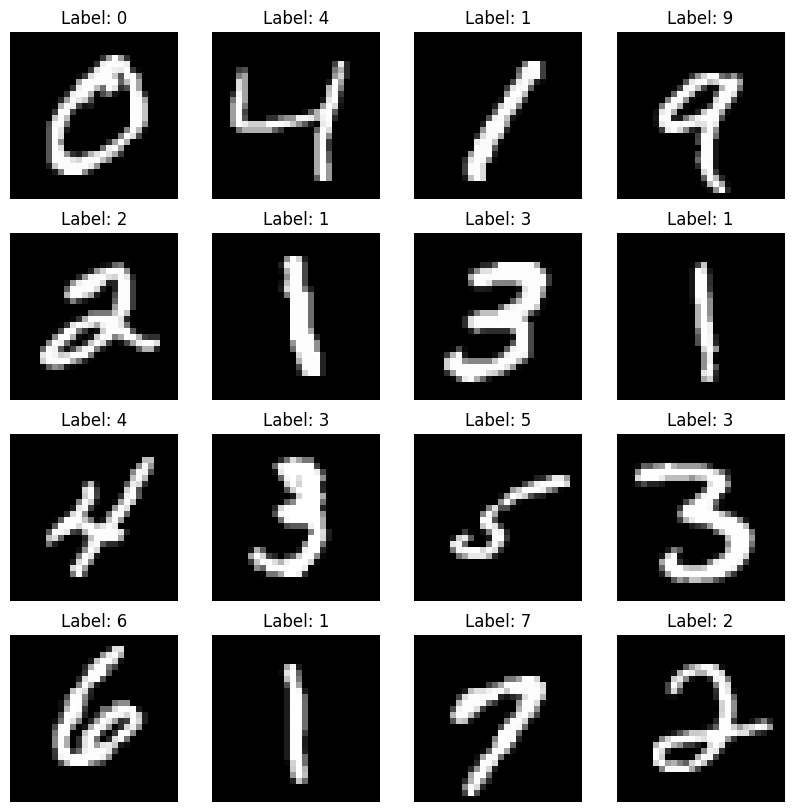

In [5]:
plt.figure(figsize=(10,10))

for i in range(1,17):
  plt.subplot(4,4,i)
  image = x_train[i]
  label = y_train[i]
  plt.imshow(image, cmap='gray')
  plt.title(f"Label: {label}")
  plt.axis('off')
plt.show()

## Building a neural network model

In [6]:
model = Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu', name='layer1'),
        Dense(10, activation ='linear', name = 'layerrr')
    ]
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 layer1 (Dense)              (None, 128)               692352    
                                                                 
 layerrr (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

Callback function defines the condition, which when reached, stops the model from training further.

In [8]:
class callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch, logs={}):
    if(logs.get('sparse_categorical_accuracy') > .995):
      print("Accuracy reached")
      self.model.stop_training = True

In [9]:
callback = callback()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],)

In [10]:
history = model.fit(x_train,y_train, epochs=10, callbacks = [callback])

Epoch 1/10
1875/1875 [==============================] - 19s 6ms/step - loss: 0.4069 - sparse_categorical_accuracy: 0.9358
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0788 - sparse_categorical_accuracy: 0.9764
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0562 - sparse_categorical_accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0474 - sparse_categorical_accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0349 - sparse_categorical_accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0299 - sparse_categorical_accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0255 - sparse_categorical_accuracy: 0.9925
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0232 - sparse_categorical_accuracy: 0.9927
Epoch 9/10
1875/1875 [=========

In [11]:
loss = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1136 - sparse_categorical_accuracy: 0.9807


<Figure size 900x600 with 0 Axes>

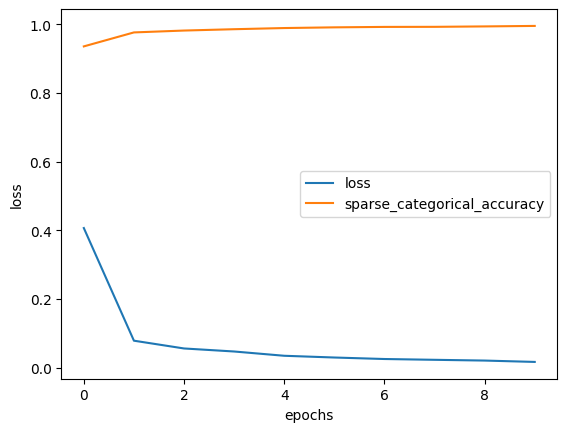

In [12]:
df = pd.DataFrame(history.history)
#--------------
plt.figure(figsize=(9,6))
df.plot()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

## Evaluating performance on Test Set


In [13]:
y_p = model.predict(x_test)
y_p = tf.nn.softmax(y_p).numpy()
y_p = np.argmax(y_p, axis=1)

313/313 [==============================] - 1s 2ms/step


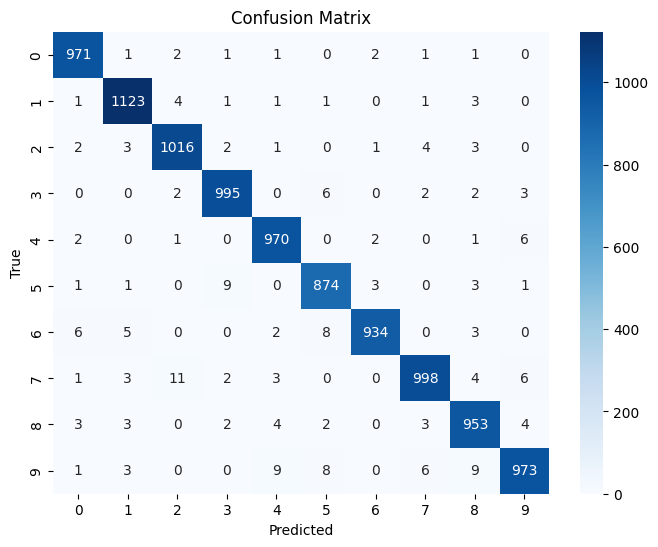

In [14]:
confusion = confusion_matrix(y_test, y_p)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [15]:
misclassified = np.where(y_p != y_test)[0]
len(misclassified),len(y_test)

(193, 10000)

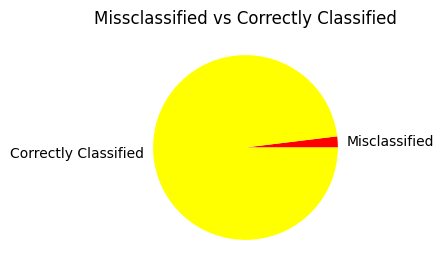

In [16]:
plt.figure(figsize=(3, 3))
plt.pie([len(misclassified), len(y_test)-len(misclassified)], labels=['Misclassified','Correctly Classified'], colors=['red','yellow'])
plt.title('Missclassified vs Correctly Classified')
plt.show()

#Training for MINST Fashion dataset (But on limited data)

In [19]:
(xfx_train, xfy_train), (xfx_test, xfy_test) = tf.keras.datasets.fashion_mnist.load_data()

In [20]:
#Limiting avialable data to only 500 data points
fx_train = xfx_train[:500]
fy_train = xfy_train[:500]

In [21]:
fx_train.shape

(500, 28, 28)

###EXECUTING TRANSFER LEARNING ON THE PREVIOUS MODEL

In [17]:
for layer in model.layers[:-1]:
    layer.trainable = False

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 layer1 (Dense)              (None, 128)               692352    
                                                                 
 layerrr (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 1290 (5.04 KB)
Non-trainable params: 692672 (2.64 MB)
___________________

In [22]:
import time

In [23]:
start_time = time.time()
m_history = model.fit(fx_train,fy_train, epochs = 10)
end_time = time.time()
execution_time= end_time - start_time

print(f"Execution time: {execution_time} seconds")

Epoch 1/10
16/16 [==============================] - 0s 6ms/step - loss: 3.2753 - sparse_categorical_accuracy: 0.4600
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5630 - sparse_categorical_accuracy: 0.8060
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.2214 - sparse_categorical_accuracy: 0.9300
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 0.0777 - sparse_categorical_accuracy: 0.9740
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0403 - sparse_categorical_accuracy: 0.9860
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 0.0162 - sparse_categorical_accuracy: 0.9980
Epoch 7/10
16/16 [==============================] - 0s 4ms/step - loss: 0.0092 - sparse_categorical_accuracy: 0.9980
Epoch 8/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0055 - sparse_categorical_accuracy: 1.0000
Epoch 9/10
16/16 [==============================] - 0s 3ms/step 

###Comparing To direct method

In [24]:
model_f = Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu', name='layer1'),
        Dense(10, activation ='linear', name = 'layerrr')
    ]
)

model_f.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],)



In [25]:
model_f.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 layer1 (Dense)              (None, 128)               692352    
                                                                 
 layerrr (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [26]:
start_time = time.time()
ff_history = model_f.fit(fx_train, fy_train, epochs=10)
end_time = time.time()
execution_time= end_time - start_time

print(f"Execution time: {execution_time} seconds")

Epoch 1/10
16/16 [==============================] - 3s 4ms/step - loss: 10.1082 - sparse_categorical_accuracy: 0.1060
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 10.8637 - sparse_categorical_accuracy: 0.1060
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 10.8637 - sparse_categorical_accuracy: 0.1060
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 10.8637 - sparse_categorical_accuracy: 0.1060
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 10.8637 - sparse_categorical_accuracy: 0.1060
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 10.8637 - sparse_categorical_accuracy: 0.1060
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 10.8637 - sparse_categorical_accuracy: 0.1060
Epoch 8/10
16/16 [==============================] - 0s 3ms/step - loss: 10.8637 - sparse_categorical_accuracy: 0.1060
Epoch 9/10
16/16 [==============================] - 0s 3

In [27]:
f_loss = model_f.evaluate(xfx_test,xfy_test) ##Direct method evaluation

313/313 [==============================] - 1s 3ms/step - loss: 11.0572 - sparse_categorical_accuracy: 0.1000


In [28]:
_loss = model.evaluate(xfx_test,xfy_test) ##Transfer Learning evaluation

313/313 [==============================] - 1s 3ms/step - loss: 1.2122 - sparse_categorical_accuracy: 0.7799
